# 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving spambasedata.csv to spambasedata.csv


In [3]:
data = pd.read_csv("spambasedata.csv", sep =',')
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail'
,'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email'
,'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl'
,'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415'
,'word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting'
,'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_('
,'char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
]

In [5]:
len(names)

58

In [6]:
data.columns = names

In [7]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [9]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# EDA

In [10]:
data.spam.value_counts()

0    2788
1    1812
Name: spam, dtype: int64

In [11]:
#Checking Nulls
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [12]:
#Total Duplicated Values
data.duplicated().sum()

391

In [13]:
#Dropping Duplicate records
updated_data = data.drop_duplicates()

In [14]:
updated_data.spam.value_counts()

0    2531
1    1678
Name: spam, dtype: int64

In [15]:
indepedent = updated_data.iloc[:,:-1]
depedent= updated_data.spam
print(Counter(depedent))

Counter({0: 2531, 1: 1678})


In [16]:
oversample = SMOTE()
X, y = oversample.fit_resample(indepedent, depedent)

In [17]:
df2 = pd.DataFrame(X, columns = updated_data.columns)
df2['spam'] = y

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardization = scaler.fit_transform(X)
X.describe()
dataframe = df2.copy()

In [19]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [20]:
dataframe = df2.copy()

# Train Test Split to perform model evaluation 

In [21]:
from sklearn.model_selection import train_test_split
#X = dataframe.drop(['spam'], axis=1)
y = dataframe.spam
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [22]:
dd = y.value_counts().values
ll = list(dd)
ll

[2531, 2531]

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(), 
          n_features_to_select=10, step=10)
_ = rfe.fit(X_train, Y_train)

print(X_train.columns[rfe.support_])

Index(['word_freq_remove', 'word_freq_free', 'word_freq_you', 'word_freq_your',
       'word_freq_hp', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [24]:
X_train = X_train[X_train.columns[rfe.support_]]
X_test = X_test[X_test.columns[rfe.support_]]

In [25]:
X_test.columns

Index(['word_freq_remove', 'word_freq_free', 'word_freq_you', 'word_freq_your',
       'word_freq_hp', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')

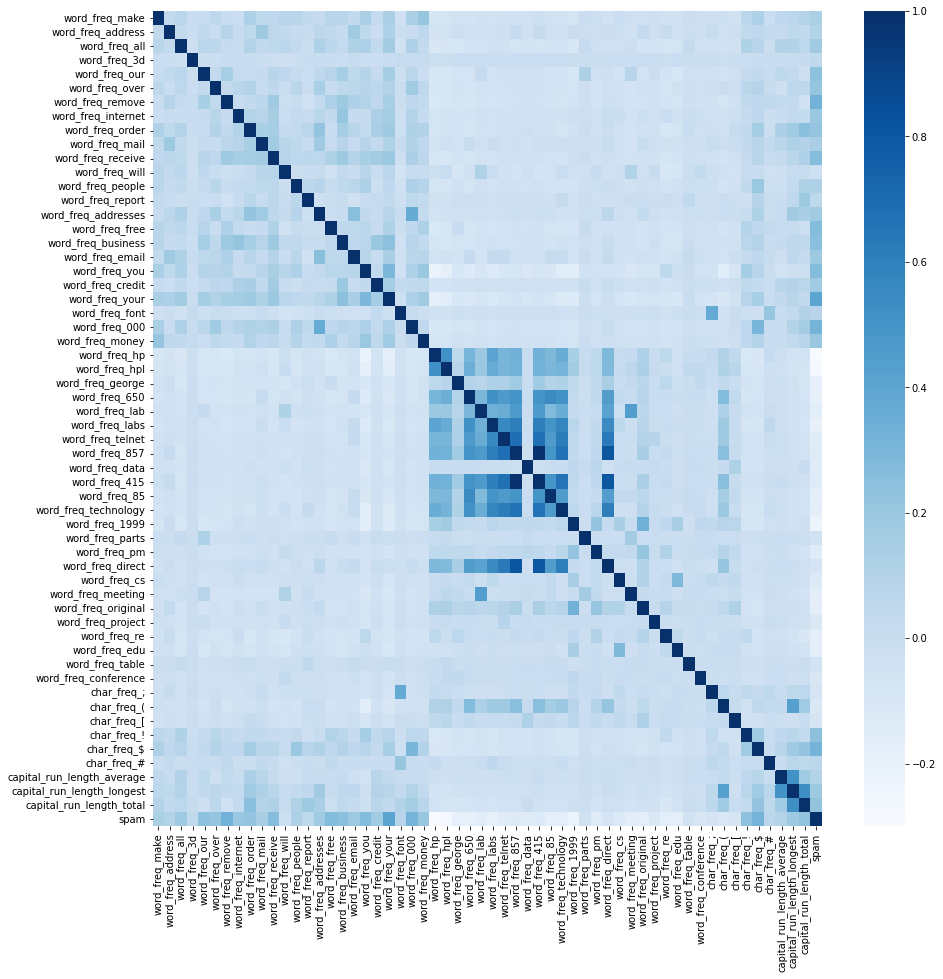

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.041758,0.071585,0.003108,0.015122,0.061169,0.006588,-0.007749,0.124831,0.058102,...,-0.029903,-0.025140,-0.036254,0.066387,0.119971,-0.009844,0.051639,0.068368,0.100971,0.132338
word_freq_address,0.041758,1.000000,0.034113,-0.007362,0.045925,0.007463,0.091162,0.014964,0.058490,0.191148,...,0.016667,-0.028048,-0.020585,0.040655,0.052385,0.035011,0.029193,0.056884,0.043223,0.105930
word_freq_all,0.071585,0.034113,1.000000,-0.021425,0.074708,0.064721,0.028068,0.007079,0.097674,0.041814,...,-0.037460,-0.031945,-0.037241,0.112312,0.088108,-0.001779,0.110827,0.103086,0.062318,0.185825
word_freq_3d,0.003108,-0.007362,-0.021425,1.000000,-0.002723,-0.008601,0.011050,0.003130,0.008112,-0.003918,...,-0.000232,-0.011263,-0.007600,-0.006344,0.008725,-0.000260,0.004103,0.017630,0.020063,0.047645
word_freq_our,0.015122,0.045925,0.074708,-0.002723,1.000000,0.042689,0.146353,0.022237,0.011163,0.029886,...,-0.033643,-0.056843,-0.028718,0.020545,0.038228,0.014521,0.058348,0.042391,-0.019114,0.238834
word_freq_over,0.061169,0.007463,0.064721,-0.008601,0.042689,1.000000,0.042046,0.084346,0.102491,0.010240,...,-0.022709,-0.003828,-0.014909,0.074124,0.095527,0.018383,-0.019066,0.061496,0.062027,0.212985
word_freq_remove,0.006588,0.091162,0.028068,0.011050,0.146353,0.042046,1.000000,0.025818,0.040895,0.069162,...,-0.040500,-0.061677,-0.032042,0.042355,0.055412,0.048542,0.031238,0.038793,-0.032966,0.325231
word_freq_internet,-0.007749,0.014964,0.007079,0.003130,0.022237,0.084346,0.025818,1.000000,0.105257,0.088700,...,-0.033016,-0.040305,-0.022010,0.025718,0.053280,-0.010984,0.005474,0.032306,0.031796,0.199047
word_freq_order,0.124831,0.058490,0.097674,0.008112,0.011163,0.102491,0.040895,0.105257,1.000000,0.144326,...,-0.020300,-0.040121,0.023084,0.039987,0.157160,-0.002352,0.126666,0.178162,0.248659,0.221919
word_freq_mail,0.058102,0.191148,0.041814,-0.003918,0.029886,0.010240,0.069162,0.088700,0.144326,1.000000,...,0.005353,-0.010733,0.002921,0.038151,0.082005,0.040069,0.085248,0.117748,0.100574,0.140290


In [26]:
plt.figure(figsize = [15,15])
sns.heatmap(dataframe.corr(), cmap='Blues')
plt.show()
dataframe.corr()

In [27]:
metric_result = pd.DataFrame(np.zeros((7,5)), columns=['Model_Acc', 'Presc','Recall','f1_score','Auc_ruc'])
metric_result.index=['Support Vector Machine (SVM)','Gradient Boosting (GB)','Ensemble Boosting with SVM (SvmBoost)'
                          ,'Ensemble Bagging with SVM (SvmBag)', 'Logistic Regression (LR)','RandomForestClassifier','KNeighborsClassifier']
metric_result

,Model_Acc,Presc,Recall,f1_score,Auc_ruc
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Ensemble Boosting with SVM (SvmBoost),0.0,0.0,0.0,0.0,0.0
Ensemble Bagging with SVM (SvmBag),0.0,0.0,0.0,0.0,0.0
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
RandomForestClassifier,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0


In [28]:
def Metrics_for_testing_model(pred,predection_probality,i):
    metric_result.iloc[i]['Recall']=round(recall_score(Y_test, pred),3)*100
    metric_result.iloc[i]['Precision']=round(precision_score(Y_test, pred),3)*100
    metric_result.iloc[i]['Accuracy']=round(accuracy_score(Y_test, pred),3)*100   
    metric_result.iloc[i]['F1-score']=round(f1_score(Y_test, pred),3)*100
    metric_result.iloc[i]['AUC-ROC score']=round(roc_auc_score(Y_test, pred),3)*100
    #print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('F1 Score = {}%'.format(round(f1_score(Y_test, pred, average='weighted'),3)*100))
    print('Accuracy = {}%'.format(round(accuracy_score(Y_test, pred),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Y_test, pred))
    
    roc_curve(Y_test, predection_probality)
    plt.show()

In [29]:
SVM = SVC(probability=True).fit(X_train, Y_train)
pred = SVM.predict(X_test)
pred_prob = SVM.predict_proba(X_test)
pred_prob = pred_prob[:, 1]
Metrics_for_testing_model(pred,pred_prob,1)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 68.5%
Accuracy = 68.8%

 Confusiton Matrix:
 [[398 115]
 [201 299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.78      0.72       513
           1       0.72      0.60      0.65       500

    accuracy                           0.69      1013
   macro avg       0.69      0.69      0.69      1013
weighted avg       0.69      0.69      0.69      1013



In [30]:
metric_result

,Model_Acc,Presc,Recall,f1_score,Auc_ruc
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,59.8,0.0,0.0
Ensemble Boosting with SVM (SvmBoost),0.0,0.0,0.0,0.0,0.0
Ensemble Bagging with SVM (SvmBag),0.0,0.0,0.0,0.0,0.0
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
RandomForestClassifier,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0


In [ ]:
SvmBoost = AdaBoostClassifier(base_estimator=SVM, n_estimators=50, random_state=314).fit(X_train, Y_train)
pred = SvmBoost.predict(X_test)
pred_prob = SvmBoost.predict_proba(X_test)
pred_prob = pred_prob[:, 1]
Metrics_for_testing_model(pred,pred_prob,2)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 59.8%
Accuracy = 62.3%

 Confusiton Matrix:
 [[444  69]
 [313 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.87      0.70       513
           1       0.73      0.37      0.49       500

    accuracy                           0.62      1013
   macro avg       0.66      0.62      0.60      1013
weighted avg       0.66      0.62      0.60      1013



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
knn_pred_prob = Knn.predict_proba(X_test)
knn_pred_prob = knn_pred_prob[:, 1]
Metrics_for_testing_model(pred,knn_pred_prob,2)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 58.3%
Accuracy = 61.1%

 Confusiton Matrix:
 [[445  68]
 [326 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.87      0.69       513
           1       0.72      0.35      0.47       500

    accuracy                           0.61      1013
   macro avg       0.65      0.61      0.58      1013
weighted avg       0.65      0.61      0.58      1013



In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, Y_train)
clf_pred_prob = Knn.predict_proba(X_test)
clf_pred_prob = clf_pred_prob[:, 1]
Metrics_for_testing_model(pred,clf_pred_prob,2)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 58.3%
Accuracy = 61.1%

 Confusiton Matrix:
 [[445  68]
 [326 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.87      0.69       513
           1       0.72      0.35      0.47       500

    accuracy                           0.61      1013
   macro avg       0.65      0.61      0.58      1013
weighted avg       0.65      0.61      0.58      1013



In [ ]:
SvmBag = BaggingClassifier(base_estimator=SVM, n_estimators=31, random_state=314).fit(X_train, Y_train)
pred = SvmBag.predict(X_test)
pred_prob = SvmBag.predict_proba(X_test)
pred_prob = pred_prob[:, 1]
Metrics_for_testing_model(pred,pred_prob,3)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 67.0%
Accuracy = 67.2%

 Confusiton Matrix:
 [[388 125]
 [207 293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       513
           1       0.70      0.59      0.64       500

    accuracy                           0.67      1013
   macro avg       0.68      0.67      0.67      1013
weighted avg       0.68      0.67      0.67      1013



In [ ]:
LR = LogisticRegression().fit(X_train, Y_train)
pred = LR.predict(X_test)
predection_probality = LR.predict_proba(X_test)
predection_probality = predection_probality[:, 1]
Metrics_for_testing_model(pred,predection_probality,0)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 87.2%
Accuracy = 87.2%

 Confusiton Matrix:
 [[459  54]
 [ 76 424]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       513
           1       0.89      0.85      0.87       500

    accuracy                           0.87      1013
   macro avg       0.87      0.87      0.87      1013
weighted avg       0.87      0.87      0.87      1013



In [ ]:
GB = GradientBoostingClassifier().fit(X_train, Y_train)
pred = GB.predict(X_test)
pred_prob = GB.predict_proba(X_test)
pred_prob = pred_prob[:, 1]
Metrics_for_testing_model(pred,pred_prob,4)
#AUC_ROC_plot(Y_test, pred)

F1 Score = 93.0%
Accuracy = 93.0%

 Confusiton Matrix:
 [[488  25]
 [ 46 454]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       513
           1       0.95      0.91      0.93       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



In [ ]:
import pickle
pickle.dump(SvmBag, open('Final_model', 'wb'))